author : sybyeon1102@gmail.com

# import

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', family='Malgun Gothic') # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호출력 설정
plt.rc('font', size=16)

import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [230]:
df = pd.read_csv('./data/rawdata.CSV', encoding='euc-kr')

In [231]:
df.head(2)

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [232]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

# 남자, 40-45세만

In [233]:
df.drop(index=df[df['성별코드'] == 2].index, inplace=True)

In [234]:
df.drop(index=df[df['연령대 코드(5세단위)'] > 9].index, inplace=True)

In [235]:
df1 = df[['허리둘레', '신장(5Cm단위)', '체중(5Kg 단위)', '흡연상태', '음주여부', '식전혈당(공복혈당)']].copy()

# bmi 구하고 비만유무(23기준)나눔

In [236]:
df1['bmi'] = (df1['체중(5Kg 단위)']/(df1['신장(5Cm단위)']/100)**2).round(1)

In [237]:
df1.drop(columns=['신장(5Cm단위)', '체중(5Kg 단위)'], inplace=True)

In [238]:
df1['bmiCAT'] = df1.bmi//23

In [239]:
df1[df1.bmiCAT > 1] = 1.0

# 복부비만여부 90기준으로 나눔

In [240]:
df1['waist'] = (df1['허리둘레']//90).round(0)

In [241]:
df1.waist.unique()

array([ 0.,  1., nan])

In [242]:
df1.drop(columns=['허리둘레', 'bmi'], inplace=True)

# 공복혈당 3단계로 나눔

In [243]:
def cat_glu(x):
    if x < 100:
        return 0
    elif x < 126:
        return 1
    else:
        return 2

In [244]:
df1['gluCAT'] = df1['식전혈당(공복혈당)'].apply(cat_glu)

# 코드들을 설명으로 변경

In [245]:
df1['흡연상태'].replace([1.0, 2.0, 3.0], ['흡연경험무', '금연', '흡연중'], inplace=True)

In [246]:
df1['음주여부'].replace([0.0, 1.0], ['음주안함', '음주함'], inplace=True)

In [247]:
df1['bmiCAT'].replace([0, 1], ['정상체중', '비만체중'], inplace=True)

In [248]:
df1['waist'].replace([0, 1], ['정상허리둘레', '복부비만'], inplace=True)

In [249]:
df1['gluCAT'].replace([0, 1, 2], ['정상혈당', '당뇨전단계', '당뇨'], inplace=True)

# 그룹화 해서 평균으로 sort

In [250]:
g1 = df1.groupby(by=['bmiCAT', 'waist','흡연상태', '음주여부'])

In [251]:
df2 = g1.describe()

In [252]:
df2 = df2['식전혈당(공복혈당)'][['count', 'mean']]

In [253]:
df3 = df2.sort_values(by='mean')

In [254]:
df3

count        mean
bmiCAT waist  흡연상태  음주여부                     
정상체중   정상허리둘레 흡연경험무 음주안함   1831.0   95.513381
       복부비만   흡연경험무 음주함      52.0   95.615385
       정상허리둘레 흡연경험무 음주함    5071.0   96.187537
       복부비만   금연    음주안함     13.0   96.230769
       정상허리둘레 금연    음주함    4922.0   96.639374
                    음주안함    699.0   97.288984
              흡연중   음주안함   1156.0   97.506055
비만체중   정상허리둘레 흡연경험무 음주안함   2348.0   98.944208
              금연    음주안함   1083.0   99.167128
정상체중   복부비만   흡연경험무 음주안함     19.0   99.421053
       정상허리둘레 흡연중   음주함    9096.0   99.544965
비만체중   정상허리둘레 흡연경험무 음주함    8268.0   99.822811
              금연    음주함    9165.0  100.829242
              흡연중   음주안함   1618.0  101.339926
                    음주함   13139.0  102.971002
정상체중   복부비만   흡연중   음주함     112.0  103.267857
              금연    음주함      61.0  105.540984
비만체중   복부비만   흡연경험무 음주안함   1866.0  105.633441
              금연    음주함    7608.0  105.678496
                    음주안함    883.0  105.762174
              흡연경험무 음주함    6077.0  105.765016
              흡연중   음주함   11893.0  109.248213
                    음주안함   1397.0  110.148890
정상체중   복부비만   흡연중   음주안함     11.0  110.545455

# 전단계, 당뇨 각각 count 구함

In [255]:
df3['gluCAT_1'] = np.nan
df3['gluCAT_2'] = np.nan

In [256]:
for idx in g1.indices.keys():
    vc = g1.get_group(idx).gluCAT.value_counts()
    df3.loc[idx, 'gluCAT_1'] = vc[1]
    df3.loc[idx, 'gluCAT_2'] = vc[2]

In [257]:
df3

count        mean  gluCAT_1  gluCAT_2
bmiCAT waist  흡연상태  음주여부                                         
정상체중   정상허리둘레 흡연경험무 음주안함   1831.0   95.513381     480.0      43.0
       복부비만   흡연경험무 음주함      52.0   95.615385      10.0       1.0
       정상허리둘레 흡연경험무 음주함    5071.0   96.187537    1399.0     106.0
       복부비만   금연    음주안함     13.0   96.230769       5.0       1.0
       정상허리둘레 금연    음주함    4922.0   96.639374    1478.0     113.0
                    음주안함    699.0   97.288984     199.0      18.0
              흡연중   음주안함   1156.0   97.506055     289.0      41.0
비만체중   정상허리둘레 흡연경험무 음주안함   2348.0   98.944208     719.0     105.0
              금연    음주안함   1083.0   99.167128     333.0      53.0
정상체중   복부비만   흡연경험무 음주안함     19.0   99.421053       4.0       2.0
       정상허리둘레 흡연중   음주함    9096.0   99.544965    2976.0     420.0
비만체중   정상허리둘레 흡연경험무 음주함    8268.0   99.822811    3020.0     360.0
              금연    음주함    9165.0  100.829242    3570.0     447.0
              흡연중   음주안함   1618.0  101.339926     554.0     104.0
                    음주함   13139.0  102.971002    5128.0     940.0
정상체중   복부비만   흡연중   음주함     112.0  103.267857      36.0      11.0
              금연    음주함      61.0  105.540984      24.0       4.0
비만체중   복부비만   흡연경험무 음주안함   1866.0  105.633441     737.0     197.0
              금연    음주함    7608.0  105.678496    3366.0     742.0
                    음주안함    883.0  105.762174     351.0      93.0
              흡연경험무 음주함    6077.0  105.765016    2598.0     573.0
              흡연중   음주함   11893.0  109.248213    5139.0    1609.0
                    음주안함   1397.0  110.148890     535.0     213.0
정상체중   복부비만   흡연중   음주안함     11.0  110.545455       2.0       2.0

# 전단계, 당뇨, 전단계+당뇨 각각 차지하는 비율(%) 구함

In [258]:
df3['gluCAT_1_r'] = (df3.gluCAT_1/df3['count']*100).round(1)

In [259]:
df3['gluCAT_2_r'] = (df3.gluCAT_2/df3['count']*100).round(1)

In [260]:
df4 = df3.copy()

In [261]:
df4['gluCAT_1n2_r'] = df4['gluCAT_1_r'] + df4['gluCAT_2_r']

In [262]:
df4 = df4.sort_values('gluCAT_1n2_r')

In [263]:
df4.drop(index=df4[df4['count'] < 100].index, inplace=True)

In [264]:
df4.columns

Index(['count', 'mean', 'gluCAT_1', 'gluCAT_2', 'gluCAT_1_r', 'gluCAT_2_r',
       'gluCAT_1n2_r'],
      dtype='object')

In [265]:
df5 = df4[['gluCAT_1n2_r']].sort_values('gluCAT_1n2_r')

In [266]:
df5

gluCAT_1n2_r
bmiCAT waist  흡연상태  음주여부              
정상체중   정상허리둘레 흡연경험무 음주안함          28.5
              흡연중   음주안함          28.5
              흡연경험무 음주함           29.7
              금연    음주안함          31.1
                    음주함           32.3
비만체중   정상허리둘레 흡연경험무 음주안함          35.1
              금연    음주안함          35.6
정상체중   정상허리둘레 흡연중   음주함           37.3
비만체중   정상허리둘레 흡연중   음주안함          40.6
              흡연경험무 음주함           40.9
정상체중   복부비만   흡연중   음주함           41.9
비만체중   정상허리둘레 금연    음주함           43.9
              흡연중   음주함           46.2
       복부비만   흡연경험무 음주안함          50.1
              금연    음주안함          50.3
              흡연경험무 음주함           52.2
              흡연중   음주안함          53.5
              금연    음주함           54.0
              흡연중   음주함           56.7

In [267]:
df5.gluCAT_1n2_r.values

array([28.5, 28.5, 29.7, 31.1, 32.3, 35.1, 35.6, 37.3, 40.6, 40.9, 41.9,
       43.9, 46.2, 50.1, 50.3, 52.2, 53.5, 54. , 56.7])

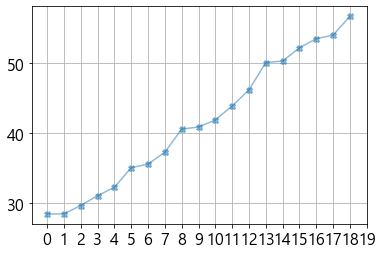

In [268]:
plt.plot(range(19), df5.gluCAT_1n2_r.values, marker='X', alpha=0.5)

plt.xticks(range(0, 20))
plt.grid()


In [269]:
df6 = df4[['mean', 'count']].sort_values('mean')

In [270]:
df6

mean    count
bmiCAT waist  흡연상태  음주여부                     
정상체중   정상허리둘레 흡연경험무 음주안함   95.513381   1831.0
                    음주함    96.187537   5071.0
              금연    음주함    96.639374   4922.0
                    음주안함   97.288984    699.0
              흡연중   음주안함   97.506055   1156.0
비만체중   정상허리둘레 흡연경험무 음주안함   98.944208   2348.0
              금연    음주안함   99.167128   1083.0
정상체중   정상허리둘레 흡연중   음주함    99.544965   9096.0
비만체중   정상허리둘레 흡연경험무 음주함    99.822811   8268.0
              금연    음주함   100.829242   9165.0
              흡연중   음주안함  101.339926   1618.0
                    음주함   102.971002  13139.0
정상체중   복부비만   흡연중   음주함   103.267857    112.0
비만체중   복부비만   흡연경험무 음주안함  105.633441   1866.0
              금연    음주함   105.678496   7608.0
                    음주안함  105.762174    883.0
              흡연경험무 음주함   105.765016   6077.0
              흡연중   음주함   109.248213  11893.0
                    음주안함  110.148890   1397.0

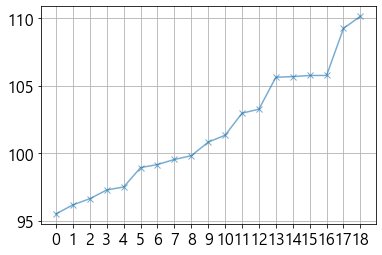

In [271]:
plt.plot(range(19), df6['mean'].values, marker='x', alpha=0.6)
plt.xticks(range(19))
plt.grid()